# Cardio Health Risk Logistic Regression Model

## What is Logistic Regression

Logistic regression is a supervised machine learning algorithm that is used for classification tasks. It uses the logit function,

## Libraries to be imported

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\radhi\\Downloads\\cardio health risk\\Heart_Disease_Prediction.csv')

In [17]:
display(df.head)

<bound method NDFrame.head of      Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     80    0                3  115          564             0            2   
2     55    1                2  124          261             0            0   
3     65    1                4  128          263             0            0   
4     45    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise

In [4]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.077778,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.201052,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,47.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,54.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,60.750000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,80.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
df.isnull()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

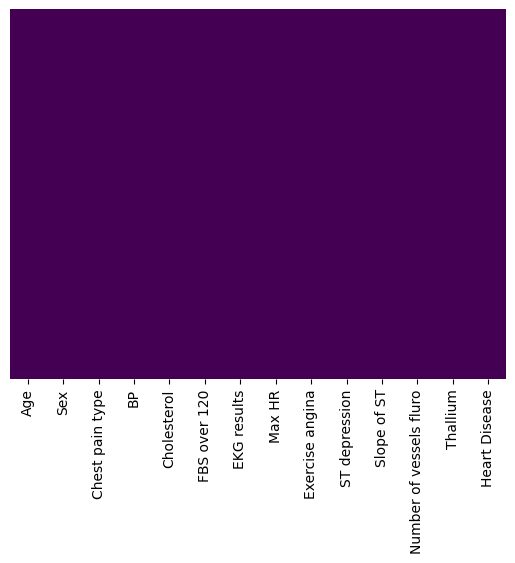

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

<Axes: xlabel='Heart Disease', ylabel='count'>

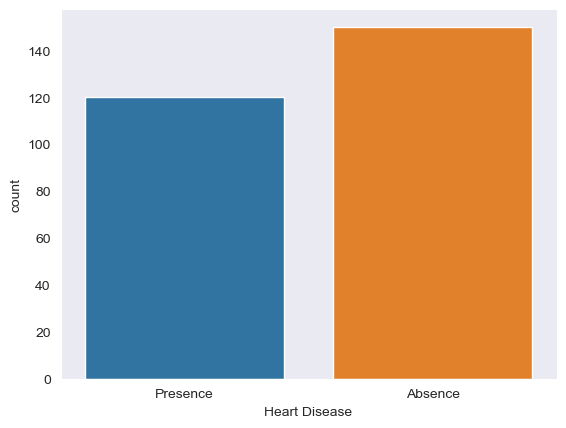

In [7]:
sns.set_style('dark')
sns.countplot(x='Heart Disease', data=df)

<Axes: xlabel='Heart Disease', ylabel='count'>

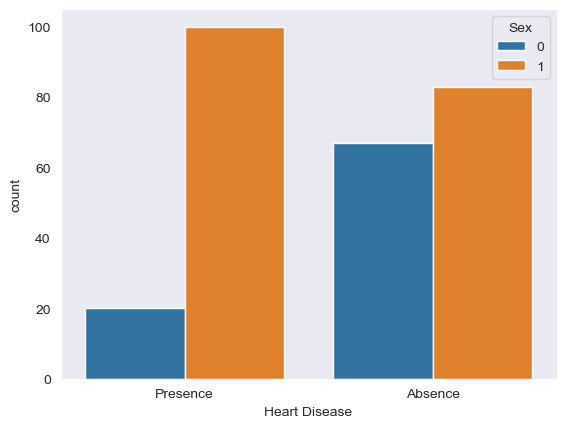

In [8]:
sns.set_style('dark')
sns.countplot(x='Heart Disease', hue = 'Sex',data=df)

In [9]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [10]:
X = df.drop(columns=['Heart Disease'])
df = pd.get_dummies(df, columns=['Heart Disease'], drop_first=True)
y = df['Heart Disease_Presence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y.head

<bound method NDFrame.head of 0       True
1      False
2       True
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269     True
Name: Heart Disease_Presence, Length: 270, dtype: bool>

In [11]:
log_reg = linear_model.LogisticRegression(max_iter = 750)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=750)

In [12]:
y_pred = log_reg.predict(X_test)

In [13]:
confusion_matrix(y_test, y_pred)

array([[37,  3],
       [ 4, 24]], dtype=int64)

In [14]:
accuracy_score(y_test, y_pred)

0.8970588235294118

In [16]:
display(classification_report(y_test, y_pred))

'              precision    recall  f1-score   support\n\n       False       0.90      0.93      0.91        40\n        True       0.89      0.86      0.87        28\n\n    accuracy                           0.90        68\n   macro avg       0.90      0.89      0.89        68\nweighted avg       0.90      0.90      0.90        68\n'